# 3. Exploratory Data Analysis - Term Deposit Subscription

## Contents
- 3.1 [Introduction](#3.1Introduction)
- 3.2 [Import, Load, Explore](#3.2-Import,Load,Explore)
- 3.3 [Analysing the target](#3.3Analysingthetarget)
- 3.4 [Univariate & Bivariate Analysis ](#3.4.Univariate&BivariateAnalysis)
   - 3.4.1 [Relationship between age and subscription](#3.4.1.Relationshipbetweenageandsubscription)
   - 3.4.2 [Relationship between balance and subscription](#3.4.2.Relationshipbetweenbalanceandsubscription)
   - 3.4.3 [Relationship between marital status and subscription](#3.4.3.Relationshipbetweenmaritalstatusandsubscription)
   - 3.4.4 [Relationship between job and subscription](#3.4.4.Relationshipbetweenjobandsubscription)
   - 3.4.5 [Relationship between education and subscription](#3.4.5.Relationshipbetweeneducationandsubscription)
   - 3.4.6 [Relationship between credit default and subscription](#3.4.6.Relationshipbetweencreditdefaultandsubscription)
   - 3.4.7 [Relationship between loans and subscription](#3.4.7.Relationshipbetweenloansandsubscription)
   - 3.4.8 [Relationship between contact type and subscription](#3.4.8.Relationshipbetweenacontacttypeandsubscription)
   - 3.4.9 [Relationship between previous outcome and subscription](#3.4.9.Relationshipbetweenpreviousoutcomeandsubscription)
   - 3.4.10 [Relationship between day and subscription](#3.4.10.Relationshipbetweendayandsubscription)
   - 3.4.11 [Relationship between month and subscription](#3.4.11.Relationshipbetweenmonthandsubscription)
   - 3.4.12 [Relationship between duration and subscription](#3.4.12.Relationshipbetweendurationandsubscription)
   - 3.4.13 [Relationship between campaign contact and subscription](#3.4.13.Relationshipbetweencampaigncontactandsubscription)
   - 3.4.14 [Relationship between days passed and subscription](#3.4.14.Relationshipbetweendayspassedandsubscription)
   - 3.4.15 [Relationship between previous contacts and subscription](#3.4.15.Relationshipbetweenpreviouscontactsandsubscription)
- 3.5 [Multivariate Analysis](#3.5.MultivariateAnalysis)
    - 3.5.1 [Correlation between variables](#3.5.1.Correlationbetweenvariables)
    - 3.5.2 [Visualizing relationships](#3.5.2.Visualizingrelationships)
- 3.6 [Summary](#3.6.Summary)


## 3.1 Introduction <a id="3.1Introduction"></a>
In this phase, I aim to explore various aspects, trends, patterns and relationships related to the term deposit subscription by performing the following:
* analyze the target variable. 
* univariate and bivariate analyses.
* multivariate analysis to understand the relationships and correlations.
* summarize trends and patterns observed throughout the analysis.

## 3.2 Import, Load, Explore <a id="3.2-Import,Load,Explore"></a>


In [1]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading clean data

data = pd.read_csv("working_data/bank_data_cleaned.csv")
data

,age,job,marital,education,credit_default,balance,housing,loan,contact_type,day,month,duration,campaign_contacts,days_passed,previous_contacts,previous_outcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,11,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,11,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,11,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,11,508,4,-1,0,unknown,no


In [3]:
data.describe()

,age,balance,day,month,duration,campaign_contacts,days_passed,previous_contacts
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,6.144655,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000


## 3.3 Analysing the target 
<a id="3.3Analysingthetarget"></a>

In [4]:
class_counts = data['subscription'].value_counts()
class_counts

no     39922
yes     5289
Name: subscription, dtype: int64

In [5]:
class_percentages = pd.Series([(x / data.shape[0]) * 100.00 for x in class_counts])
class_percentages

0    88.30152
1    11.69848
dtype: float64

## 3.4. Univariate & Bivariate Analysis 
<a id="3.4.Univariate&BivariateAnalysis"></a>

#### 3.4.1. Relationship between age and subscription
<a id="3.4.1.Relationshipbetweenageandsubscription"></a>

In [6]:
# Defining functions.

# For comparing the mean value of a variable for subscribers vs. non- subscribers:
def compare_sub(x):
    sns.catplot(x = 'subscription', y = x, data = data, kind = 'bar')
    plt.xticks(rotation = 45)
    return plt.show()

# For grouping categories along with their subscription type.
def grouping(x):
    return data.groupby('subscription')[x].value_counts().unstack()

# For describing continous variables of subscribers vs. non- subscribers.
def describe(x):
    return data.groupby('subscription')[x].describe()

# For plotting a comparison of categories of a variable against subscribers vs. non- subscribers
def catplot(m, n=90):
    sns.catplot( x = m, data = data, kind = 'count', hue = 'subscription')
    plt.xticks(rotation = n)
    return plt.show()

# For analysing the proportion of subscribers within the various catogories.
def percentage(x):
    counts = data.groupby(x)['subscription'].value_counts().unstack()
    percentage = counts.div(counts.sum(axis=0), axis=1) * 100
    return percentage

# For ploting those proportions.
def plot_pct(variable , label):
    variable.plot(kind='bar')
    plt.xlabel(label)
    plt.ylabel('Percentage of subscribers (%)')
    plt.title(f'Percentage of subscription by {label}')
    return plt.show()
        
def boxplot(n):
    sns.boxplot(x='subscription', y= n, data=data)
    plt.xlabel('Subscription')
    plt.title('Distribution by subscription')
    return plt.show()

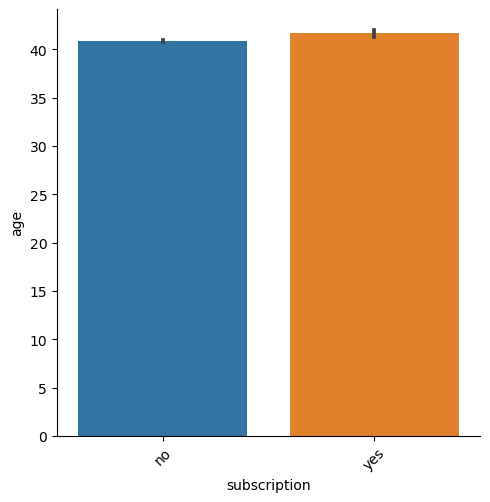

In [7]:
compare_sub('age')

In [8]:
#creating age groups to see this relationship 

data['age_group'] = pd.cut(
    data['age'], [0,20, 30, 40, 50, 60, 70, 80],
    labels = ['Under 20', '20-29', '30-39', '40-49',
              '50-59', '60-69', 'Over 70']
)

In [9]:
grouping('age_group')

age_group,Under 20,20-29,30-39,40-49,50-59,60-69,Over 70
subscription,,,,,,,
no,64,5821,15875,10220,7256,417,213
yes,33,1112,1812,1019,811,284,175


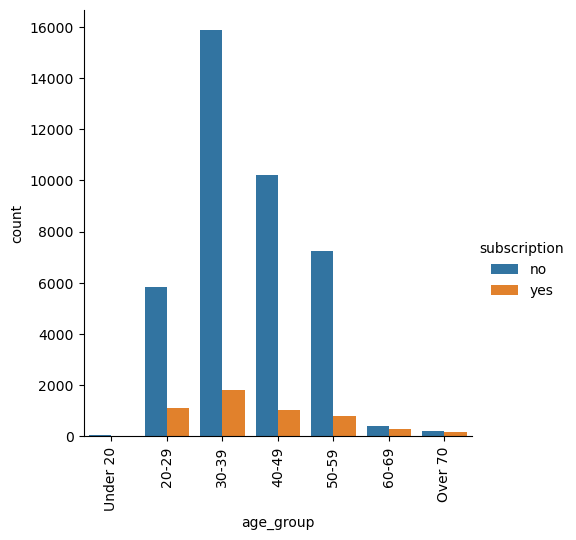

In [10]:
catplot('age_group')

In [11]:
percentage_age = percentage('age_group')
percentage_age

subscription,no,yes
age_group,,
Under 20,0.160538,0.629051
20-29,14.601415,21.197103
30-39,39.820900,34.540602
40-49,25.635880,19.424323
50-59,18.200973,15.459398
60-69,1.046004,5.413648
Over 70,0.534290,3.335875


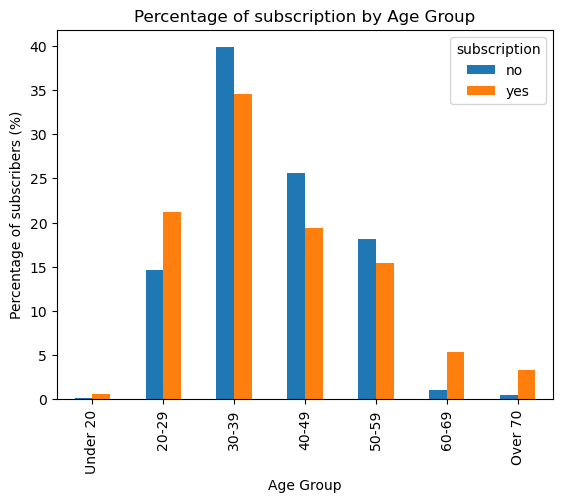

In [12]:
plot_pct(percentage_age , 'Age Group')

Initially, although the mean age of the 'yes' values is slightly higher than that of 'no' values, there is no direct/significant indication that older aged customers have higher number of subscription. 

Examining the plot showing subscription distribution by age group, it's evident that, the majority of the individuals targeted by the campaign fall within the age range of 30s and 40s. This suggests that these two demographic segments are expected to have the largest number of subscribers to term deposits. However, it's important to note that their apparent higher subscription rate is primarily due to their larger representation in the campaign.

Upon analyzing and visualising the subscription percentage within each age group, we can observe a different perspective. Specifically, individuals in their 40s, followed by those in their 30s, actually display a lower subscription rates relative to the total percentage of their respective age groups in this campaign. Conversely, a high proportion of the campaign recipients aged over 70 end up subscribing, indicating a substantial conversion rate in this age category. 

In conclusion, customers over 60 as well as those under 30 years of age exhibit notably higher subscription rates compared to others within their respective age groups.

#### 3.4.2. Relationship between balance and subscription
<a id="3.4.2.Relationshipbetweenbalanceandsubscription"></a>

In [13]:
data['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [14]:
data[data['subscription'] == 'yes']['balance'].describe()

count     5289.000000
mean      1804.267915
std       3501.104777
min      -3058.000000
25%        210.000000
50%        733.000000
75%       2159.000000
max      81204.000000
Name: balance, dtype: float64

In [15]:
data[data['subscription'] == 'no']['balance'].describe()

count     39922.000000
mean       1303.714969
std        2974.195473
min       -8019.000000
25%          58.000000
50%         417.000000
75%        1345.000000
max      102127.000000
Name: balance, dtype: float64

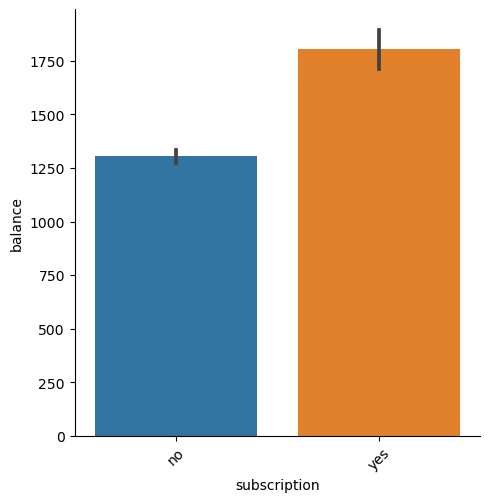

In [16]:
compare_sub('balance')

In [17]:
#removing outliers

balance_no_outlier = data['balance'][data['balance']< 10000]

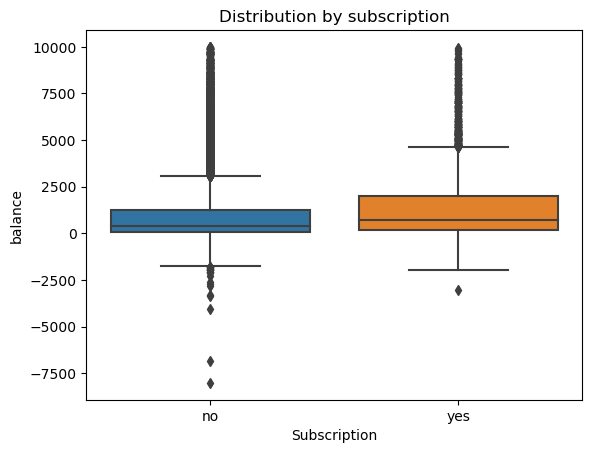

In [18]:
boxplot(balance_no_outlier)

In [19]:
#creating balance groups excluding outliers to see this relationship 

data['balance_group'] = pd.cut(
    balance_no_outlier, [-10000, 0, 2500, 5000 , 7500 ,
                      10000],
    labels = ['negative', 'under 2.5k', '2.5k-5k','5k-7.5k', 
              '7.5k-10k']
)

In [20]:
grouping('balance_group')

balance_group,negative,under 2.5k,2.5k-5k,5k-7.5k,7.5k-10k
subscription,,,,,
no,6778,27423,3317,1180,530
yes,502,3633,713,214,92


In [21]:
percentage_b = percentage('balance_group')
percentage_b

subscription,no,yes
balance_group,,
negative,17.278475,9.740008
under 2.5k,69.906699,70.488941
2.5k-5k,8.455695,13.833915
5k-7.5k,3.008055,4.152115
7.5k-10k,1.351076,1.785021


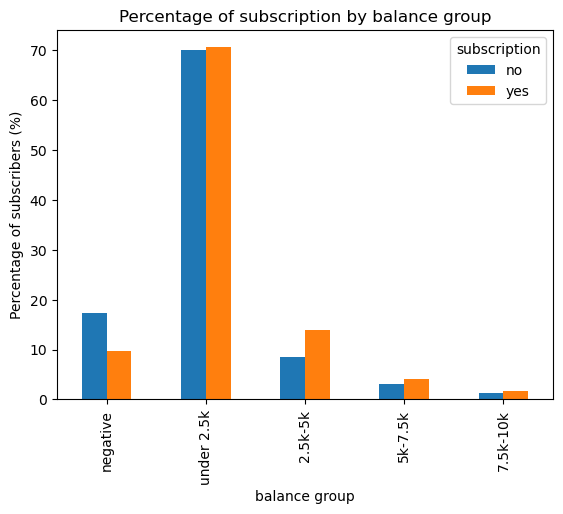

In [22]:
plot_pct(percentage_b , 'balance group')

* The bar plot in this section shows that the campaign participants that have subscribed have a higher mean balance than those that did not. Similarly, the box plot shows the campaign participants that subscribed appear to have a higher median `balance` than those who did not, indicating that a higher balance may be a contributing factor in influencing term deposit subscriptions. And we can also observe from the box plot that the distribution of `balance` for records with a 'no' subscription has a narrower spread with more outliers on both ends. 

* Generally, it appears that positive balances are associated with more 'yes' subscriptions than no, when comparing the proportion of balance groups for 'no' vs. 'yes' subscriptions. Breaking the data into 'balance groups', we see that customers with a balance of between 2.5k - 5k showed a higher subscription rate than higher positive balance groups.

* So we can conclude that moderately lower positive balance can be associated with subscription.

#### 3.4.3. Relationship between marital status and subscription
<a id="3.4.3.Relationshipbetweenmaritalstatusandsubscription"></a>

In [23]:
grouping('marital')

marital,divorced,married,single
subscription,,,
no,4585,24459,10878
yes,622,2755,1912


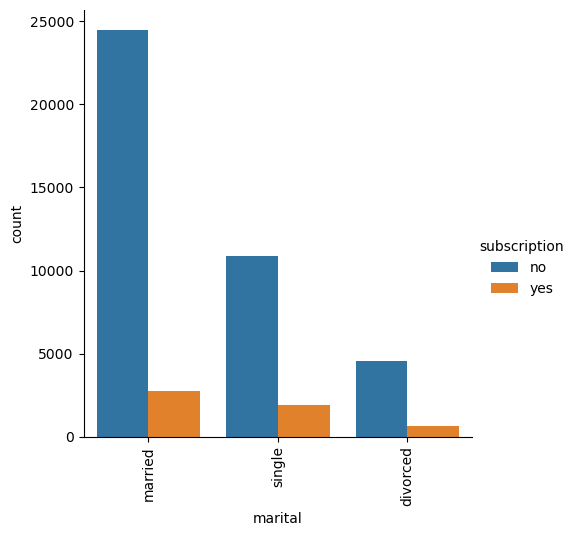

In [24]:
catplot('marital')

In [25]:
percentage_m = percentage('marital')
percentage_m

subscription,no,yes
marital,,
divorced,11.484896,11.760257
married,61.266971,52.089242
single,27.248134,36.150501


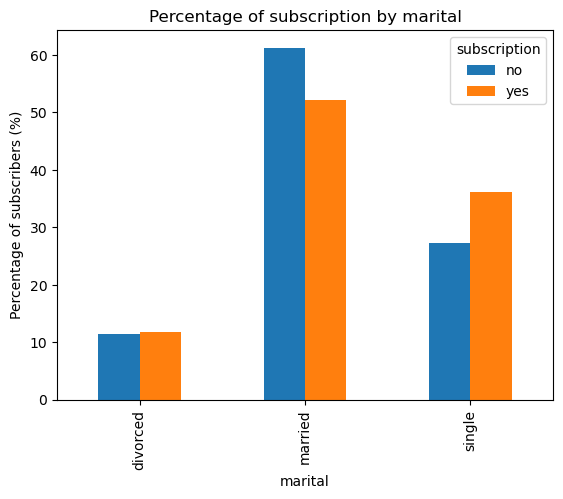

In [26]:
plot_pct(percentage_m , 'marital')

Taking a similar approach, we can see that a significant portion of campaign recipients who subscribed were identified as married, again, due to their larger representation in the campaign. And a higher proportion of 'single's actually displayed a slightly higher subscription rate compared to the other groups.

#### 3.5.4. Relationship between job and subscription
<a id="3.4.4.Relationshipbetweenjobandsubscription"></a>

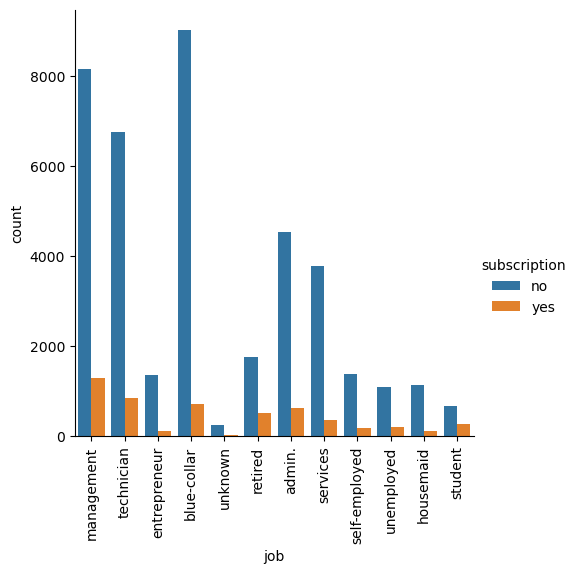

In [27]:
catplot('job', 90)

In [28]:
percentage_j = percentage('job')
percentage_j

subscription,no,yes
job,,
admin.,11.372176,11.930422
blue-collar,22.604078,13.386273
entrepreneur,3.416662,2.325581
housemaid,2.833024,2.060881
management,20.432343,24.598223
retired,4.378538,9.756098
self-employed,3.486799,3.535640
services,9.480988,6.976744
student,1.675768,5.086028


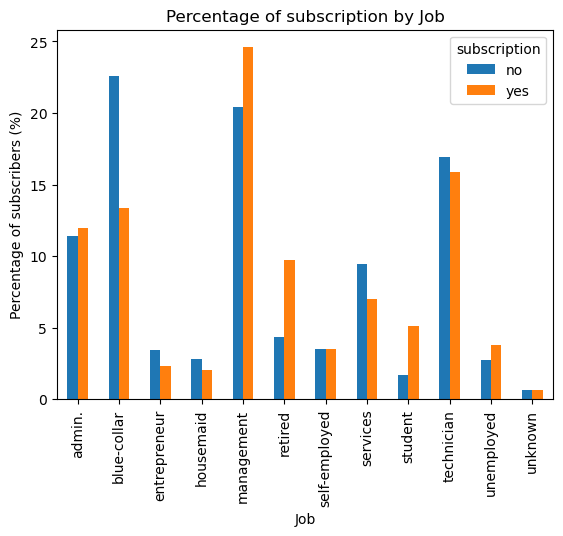

In [29]:
plot_pct(percentage_j , 'Job')

Here we can see that, although it appears that those in the 'management' job category are the highest subscribers and also have a high representation, interestingly, a higher percentage of subscriptions ('yes') during this campaign  came from individuals in job categories 'student' and 'retired' as well.

#### 3.4.5. Relationship between education and subscription
<a id="3.4.5.Relationshipbetweeneducationandsubscription"></a>

In [30]:
grouping('education')

education,primary,secondary,tertiary,unknown
subscription,,,,
no,6260,20752,11305,1605
yes,591,2450,1996,252


In [31]:
percentage_ed = percentage('education')
percentage_ed

subscription,no,yes
education,,
primary,15.680577,11.174135
secondary,51.981364,46.322556
tertiary,28.317720,37.738703
unknown,4.020340,4.764606


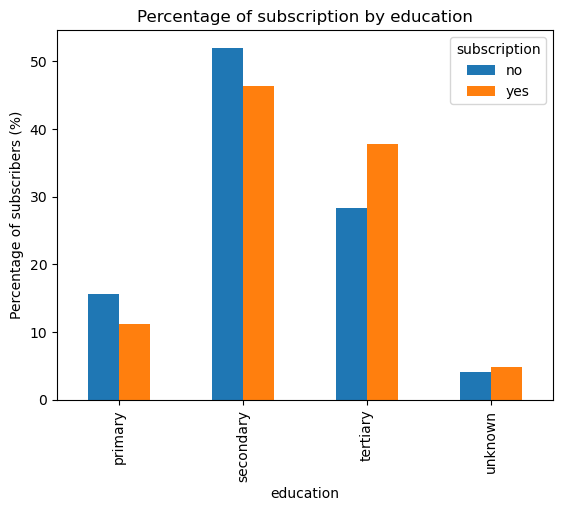

In [32]:
plot_pct(percentage_ed , 'education')

#### 3.4.6. Relationship between credit default and subscription
<a id="3.4.6.Relationshipbetweencreditdefaultandsubscription"></a>

In [33]:
grouping('credit_default')

credit_default,no,yes
subscription,,
no,39159,763
yes,5237,52


In [34]:
percentage_def = percentage('credit_default')
percentage_def

subscription,no,yes
credit_default,,
no,98.088773,99.016827
yes,1.911227,0.983173


#### 3.4.7. Relationship between loans and subscription
<a id="3.4.7.Relationshipbetweenloansandsubscription"></a>

In [35]:
grouping('housing')

housing,no,yes
subscription,,
no,16727,23195
yes,3354,1935


In [36]:
percentage_hs = percentage('housing')
percentage_hs

subscription,no,yes
housing,,
no,41.899203,63.414634
yes,58.100797,36.585366


In [37]:
grouping('loan')

loan,no,yes
subscription,,
no,33162,6760
yes,4805,484


In [38]:
percentage_ln = percentage('loan')
percentage_ln

subscription,no,yes
loan,,
no,83.066981,90.848932
yes,16.933019,9.151068


#### 3.4.8. Relationship between contact type and subscription
<a id="3.4.8.Relationshipbetweenacontacttypeandsubscription"></a>

In [39]:
grouping('contact_type')

contact_type,cellular,telephone,unknown
subscription,,,
no,24916,2516,12490
yes,4369,390,530


In [40]:
percentage_ct = percentage('contact_type')
percentage_ct

subscription,no,yes
contact_type,,
cellular,62.411703,82.605407
telephone,6.302289,7.373795
unknown,31.286008,10.020798


From the above we can observe that:
* From the percentage of each category for `education` grouped by subscription, we can observe that a greater proportion of those with 'secondary education' have subscribed as compared to the other categories.
* A somewhat larger portion of those who don't have `credit as default` have subscribed. 
* A larger portion of the bank's customers who don't have any `housing` or other type of `loans` have subscribed as opposed to those with loans.
* The variable `contact type` doesn't exhibit a notable difference in subscription rates among its categories. The majority of the campaign participants were contacted through their cellular phones and nearly a third of its values are 'unknown'. Hence, discernible patterns have not emerged yet.

#### 3.4.9. Relationship between previous outcome and subscription
<a id="3.4.9.Relationshipbetweenpreviousoutcomeandsubscription"></a>

In [41]:
data['previous_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: previous_outcome, dtype: int64

In [42]:
grouping('previous_outcome').join(grouping('previous_outcome').sum(axis = 1).rename('total_sub'))

,failure,other,success,unknown,total_sub
subscription,,,,,
no,4283,1533,533,33573,39922
yes,618,307,978,3386,5289


In [43]:
percentage_pr = percentage('previous_outcome')
percentage_pr

subscription,no,yes
previous_outcome,,
failure,10.728420,11.684628
other,3.839988,5.804500
success,1.335103,18.491208
unknown,84.096488,64.019663


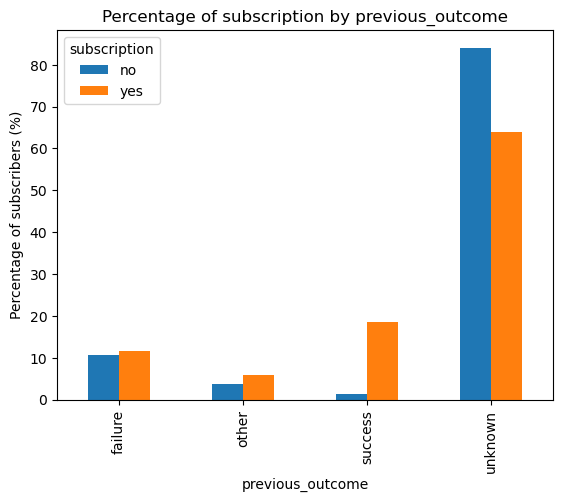

In [44]:
plot_pct(percentage_pr, 'previous_outcome')

* We can see that `previous outcome` is highly imbalances with over 80% of it falling in the category of 'unkown'. However observing at the remaining data, in terms of proportion from the total, a significant proportion of individuals who had subscribed on the previous campaign have subscribed in this campaign. This indicates that past outcomes may serve as valuable indicators for the success of the current campaign.

#### 3.4.10. Relationship between day and subscription
<a id="3.4.10.Relationshipbetweendayandsubscription"></a>

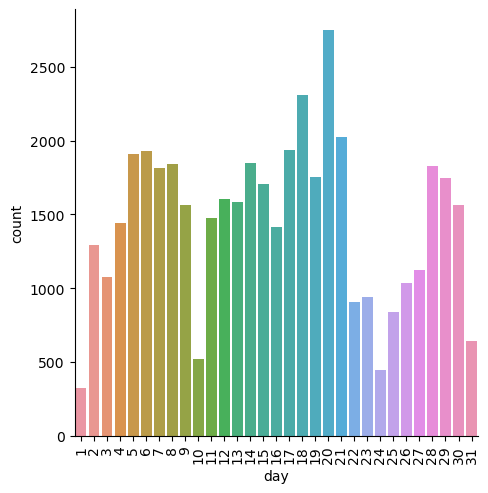

In [45]:
sns.catplot(x='day', data=data, kind = 'count')
plt.xticks(rotation = 90)
plt.show()

In [46]:
data.groupby('subscription')['day'].describe()

,count,mean,std,min,25%,50%,75%,max
subscription,,,,,,,,
no,39922.0,15.892290,8.294728,1.0,8.0,16.0,21.0,31.0
yes,5289.0,15.158253,8.501875,1.0,8.0,15.0,22.0,31.0


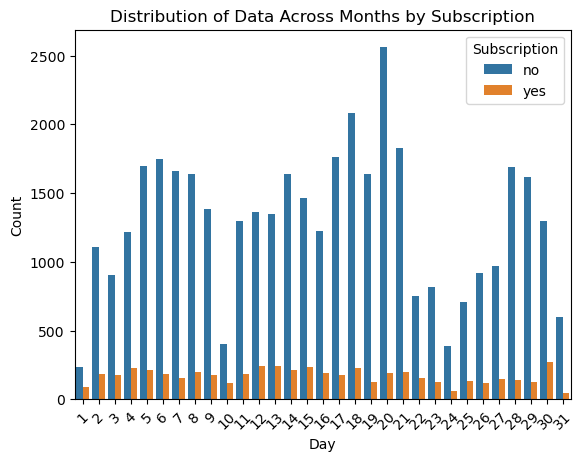

In [47]:
sns.countplot(x='day', data=data, hue='subscription')

plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Distribution of Data Across Months by Subscription')

plt.legend(title='Subscription')

plt.xticks(rotation=45)

plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


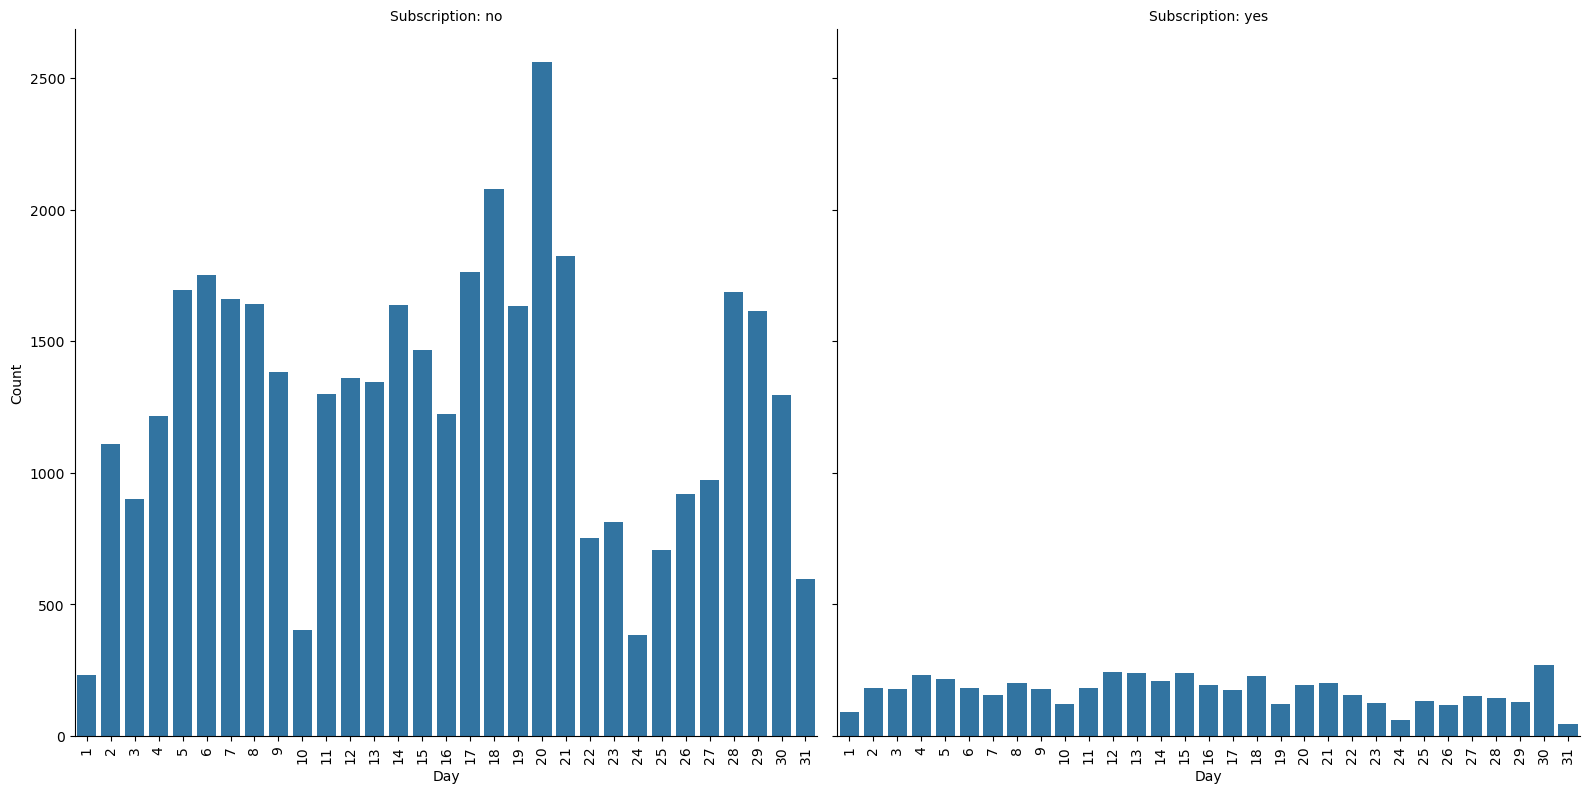

In [48]:
g = sns.FacetGrid(data, col='subscription', height = 8)
g.map(sns.countplot, 'day')
g.set_axis_labels('Day', 'Count')
g.set_titles('Subscription: {col_name}')
g.set_xticklabels(rotation=90)

plt.show()

In [49]:
percentage('day').T

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
subscription,,,,,,,,,,,,,,,,,,,,,
no,0.581133,2.782927,2.256901,3.043435,4.245779,4.386053,4.158108,4.110516,3.461750,1.009468,...,1.881168,2.036471,0.964381,1.770953,2.301989,2.432243,4.225740,4.047893,3.243825,1.495416
yes,1.701645,3.441104,3.365476,4.348648,4.065041,3.422197,2.968425,3.800340,3.384383,2.287767,...,2.911704,2.382303,1.172244,2.514653,2.193231,2.836075,2.703725,2.439024,5.123842,0.869730


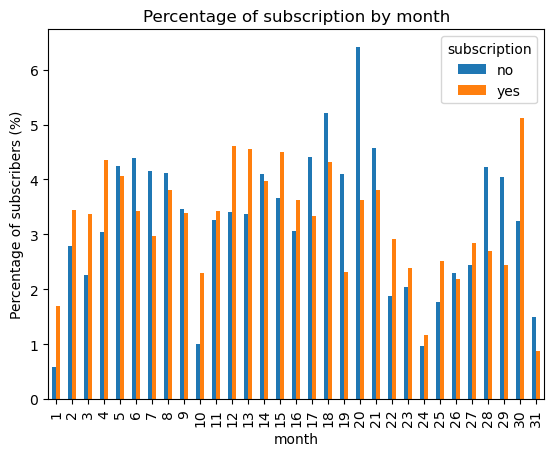

In [50]:
plot_pct(percentage('day'), 'month')

#### 3.4.11. Relationship between month and subscription
<a id="3.4.11.Relationshipbetweenmonthandsubscription"></a>

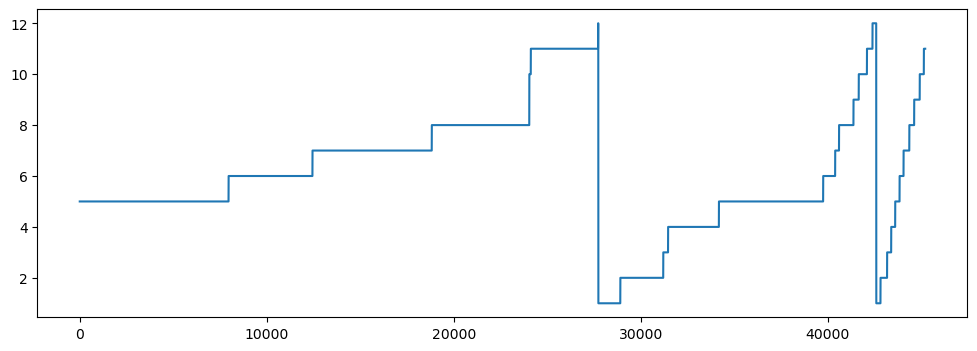

In [51]:
data['month'].plot(figsize = (12,4))
plt.show()

In [52]:
describe('month')

,count,mean,std,min,25%,50%,75%,max
subscription,,,,,,,,
no,39922.0,6.128250,2.356746,1.0,5.0,6.0,7.0,12.0
yes,5289.0,6.268482,2.761743,1.0,4.0,6.0,8.0,12.0


C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


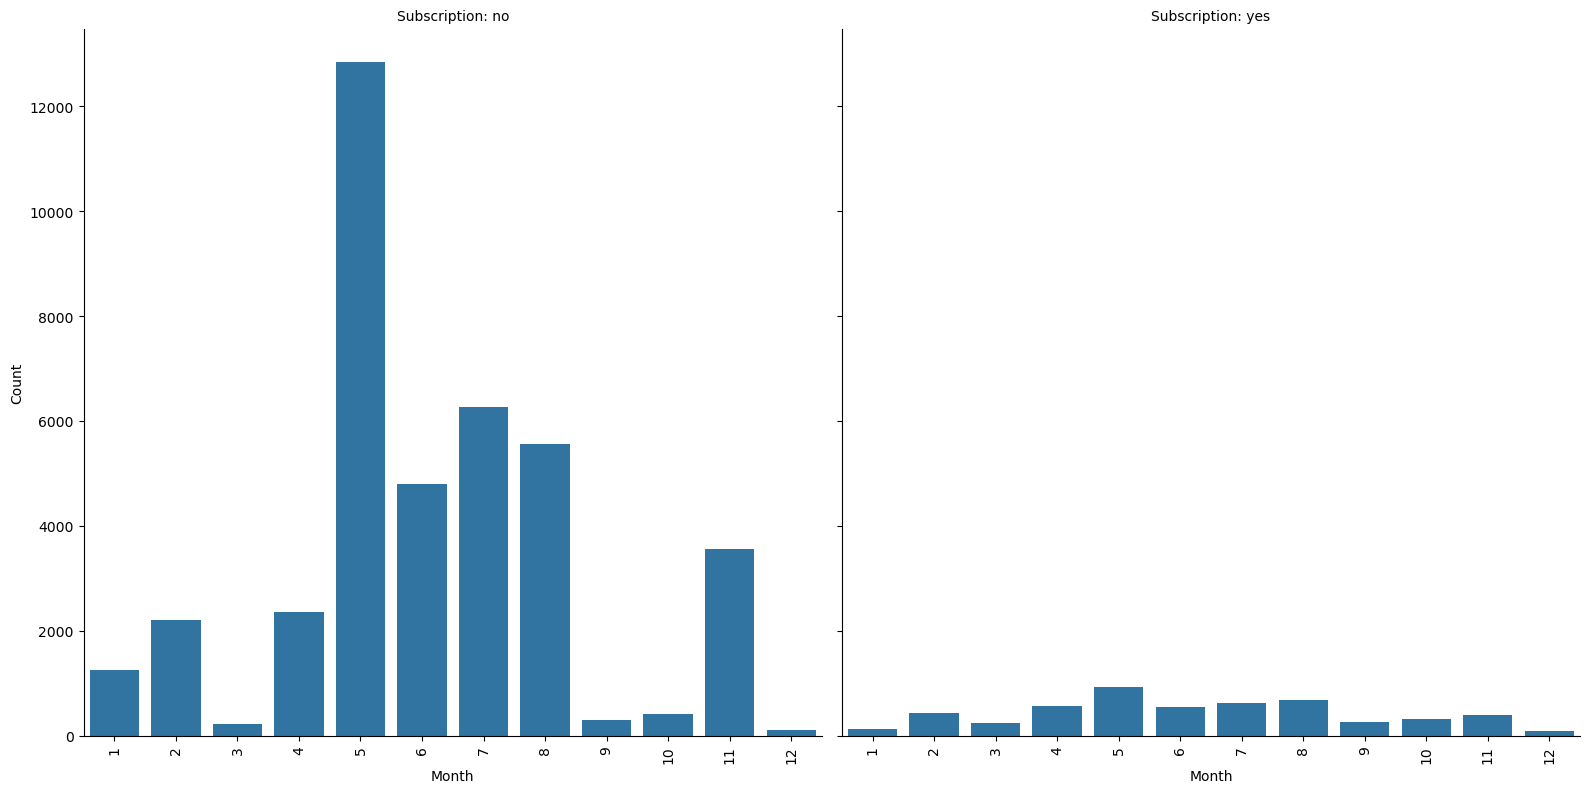

In [53]:
g = sns.FacetGrid(data, col='subscription', height = 8)
g.map(sns.countplot, 'month')
g.set_axis_labels('Month', 'Count')
g.set_titles('Subscription: {col_name}')
g.set_xticklabels(rotation=90)

plt.show()

This shows that the campaign was going on over the course of 2 years and a half with campaign calls decreasing over time through out the period.

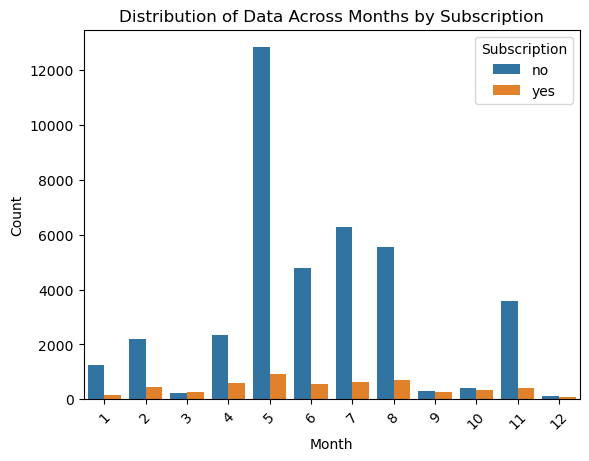

In [54]:
sns.countplot(x='month', data=data, hue='subscription')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Data Across Months by Subscription')

plt.legend(title='Subscription')

plt.xticks(rotation=45)

plt.show()

In [55]:
percentage_month = percentage('month')
percentage_month

subscription,no,yes
month,,
1,3.158659,2.684818
2,5.530785,8.338060
3,0.573619,4.688977
4,5.899003,10.909435
5,32.165222,17.489128
6,12.010921,10.323313
7,15.700616,11.854793
8,13.924653,13.008130
9,0.776514,5.086028


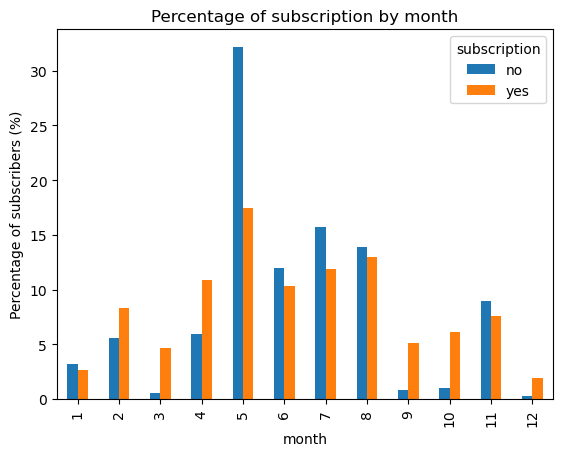

In [56]:
plot_pct(percentage_month, 'month')

While `day` doesn't show a significant variablity with regards to subscription, there is a relative spike in the rate of subscriptions on the 30th day. The variable `month` shows that, campaign calls whose last contact month was 'March' and 'September' did relatively well than other months. Conversely, the months in between specificaly records having last contact month of 'May' were the least successful in terms of subscription.

#### 3.4.12. Relationship between duration and subscription
<a id="3.4.12.Relationshipbetweendurationandsubscription"></a>

In [57]:
describe('duration')

,count,mean,std,min,25%,50%,75%,max
subscription,,,,,,,,
no,39922.0,221.182806,207.383237,0.0,95.0,164.0,279.0,4918.0
yes,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0


In [58]:
#removing outliers for plotting

dur_no_outlier = data['duration'][data['duration']< 2000]

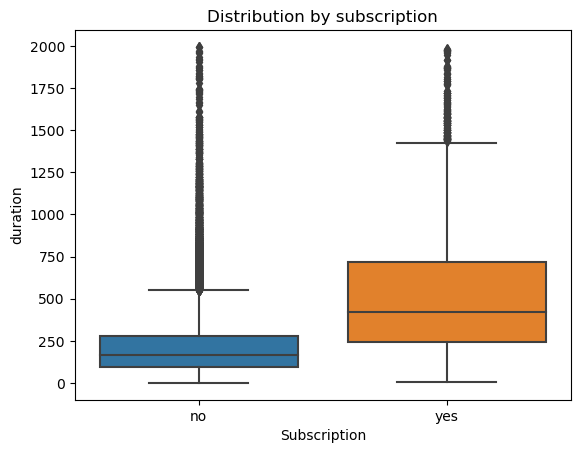

In [59]:
boxplot(dur_no_outlier)

#### 3.4.13. Relationship between campaign_contacts and subscription
<a id="3.4.13.Relationshipbetweencampaigncontactandsubscription"></a>

In [60]:
describe('campaign_contacts')

,count,mean,std,min,25%,50%,75%,max
subscription,,,,,,,,
no,39922.0,2.846350,3.212767,1.0,1.0,2.0,3.0,63.0
yes,5289.0,2.141047,1.921826,1.0,1.0,2.0,3.0,32.0


In [61]:
#removing outliers 

campc_no_outlier = data['campaign_contacts'][data['campaign_contacts']<= 30]

In [62]:
campc_no_outlier.describe()

count    45152.000000
mean         2.719459
std          2.834245
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         30.000000
Name: campaign_contacts, dtype: float64

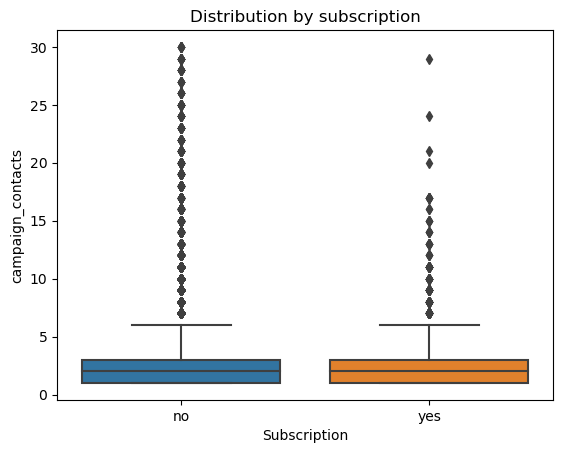

In [63]:
boxplot(campc_no_outlier)

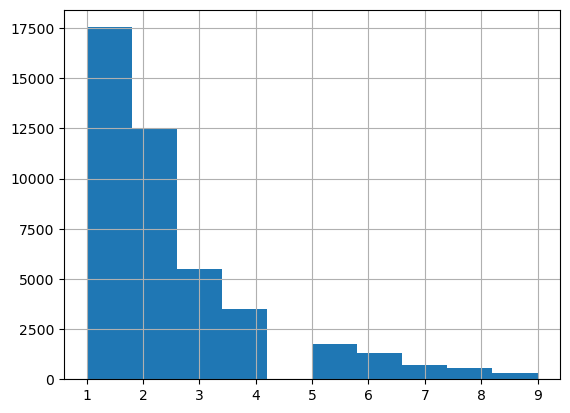

In [64]:
data[data['campaign_contacts']<10]['campaign_contacts'].hist()
plt.show()

In [65]:
yes = data[data['subscription'] == 'yes']['campaign_contacts']
no = data[data['subscription'] == 'no']['campaign_contacts']
contacts_yes = yes[yes < 10]
contacts_no = no[no < 10]

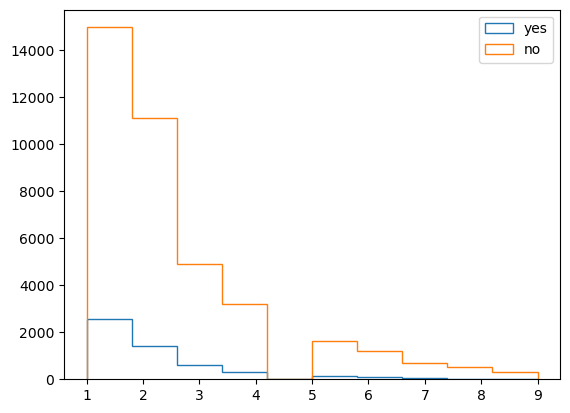

In [66]:
fig, ax = plt.subplots()

ax.hist(contacts_yes, label = 'yes', histtype = 'step')
ax.hist(contacts_no, label = 'no', histtype = 'step')
ax.legend()
plt.show()

#### 3.4.14. Relationship between days passed and subscription 
<a id="3.4.14.Relationshipbetweendayspassedandsubscription"></a>

In [67]:
describe('days_passed')

,count,mean,std,min,25%,50%,75%,max
subscription,,,,,,,,
no,39922.0,36.421372,96.757135,-1.0,-1.0,-1.0,-1.0,871.0
yes,5289.0,68.702968,118.822266,-1.0,-1.0,-1.0,98.0,854.0


In [68]:
#filtering out the days passed for those who were not previously contacted

previously_contacted = data[data['days_passed'] != -1]
previously_not_contacted = data[data['days_passed'] == -1]

In [69]:
previously_contacted.describe()

,age,balance,day,month,duration,campaign_contacts,days_passed,previous_contacts
count,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000
mean,40.953131,1556.880102,14.289209,5.833596,260.118687,2.056195,224.577692,3.177546
std,11.425180,3060.593186,7.919176,3.097522,235.208105,1.561169,115.344035,4.560820
min,18.000000,-1884.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,33.000000,168.000000,7.000000,4.000000,113.000000,1.000000,133.000000,1.000000
50%,38.000000,602.000000,14.000000,5.000000,193.000000,2.000000,194.000000,2.000000
75%,48.000000,1743.000000,20.000000,8.000000,324.000000,2.000000,327.000000,4.000000
max,93.000000,81204.000000,31.000000,12.000000,2219.000000,16.000000,871.000000,275.000000


In [70]:
previously_not_contacted['subscription'].value_counts()

no     33570
yes     3384
Name: subscription, dtype: int64

In [71]:
previously_contacted['subscription'].value_counts()

no     6352
yes    1905
Name: subscription, dtype: int64

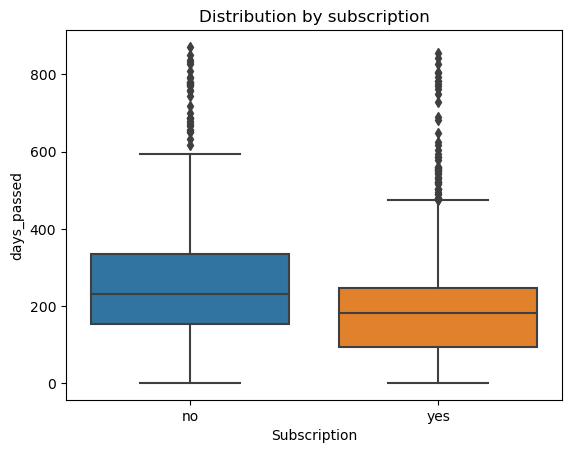

In [72]:
boxplot(previously_contacted['days_passed'])

#### 3.4.15. Relationship between  previous contacts and subscription 
<a id="3.4.15.Relationshipbetweenpreviouscontactsandsubscription"></a>

In [73]:
describe('previous_contacts')

,count,mean,std,min,25%,50%,75%,max
subscription,,,,,,,,
no,39922.0,0.502154,2.256771,0.0,0.0,0.0,0.0,275.0
yes,5289.0,1.170354,2.553272,0.0,0.0,0.0,1.0,58.0


* The `duration` variable shows a higher median and a wider spread for records with 'yes' `subscription`, hinting that a moderate conversation length during campaign calls could associate with a higher subscription rate. On the other hand, 'no' subscriptions have more outliers on the higher end.

* Regarding `campaign contacts`, most values cluster on the low end. 'no' subscriptions have more upper-end outliers.


* `days_passed` : 30% of those who were previously contacted subscribed while only 10% of those who were never previously contacted subscribed term deposits. It also revealed that the customers who subscribed tend to have a shorter `days_passed` value i.e. they were recently contacted before the campaign.

* For `previous contacts`, there's minimal variability. A substantial 81.7% of the data has a value of 0, indicating no previous contacts. And thus far, it lacks a clear pattern concerning subscriptions.

* Both `days_passed'`and `previous_contacts` are correlated, sharing a highly imbalanced value distribution. Since  `days_passed'` gives us more information than `previous_contacts`, we may remove the feature in the next phases.

## 3.5. Multivariate Analysis
<a id="3.5.MultivariateAnalysis"></a> 

### 3.5.1. Correlation between variables
 <a id="3.5.1.Correlationbetweenvariables"></a>

In [74]:
data_num = data.select_dtypes(exclude='object')

In [75]:
cor = data_num.corr()
cor

C:\Users\aabdu\AppData\Local\Temp\ipykernel_29712\360422659.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data_num.corr()


,age,balance,day,month,duration,campaign_contacts,days_passed,previous_contacts
age,1.000000,0.097783,-0.009120,0.092903,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.094605,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,0.101989,-0.030206,0.162490,-0.093044,-0.051710
month,0.092903,0.094605,0.101989,1.000000,-0.011866,0.054868,-0.108940,-0.035600
duration,-0.004648,0.021560,-0.030206,-0.011866,1.000000,-0.084570,-0.001565,0.001203
campaign_contacts,0.004760,-0.014578,0.162490,0.054868,-0.084570,1.000000,-0.088628,-0.032855
days_passed,-0.023758,0.003435,-0.093044,-0.108940,-0.001565,-0.088628,1.000000,0.454820
previous_contacts,0.001288,0.016674,-0.051710,-0.035600,0.001203,-0.032855,0.454820,1.000000


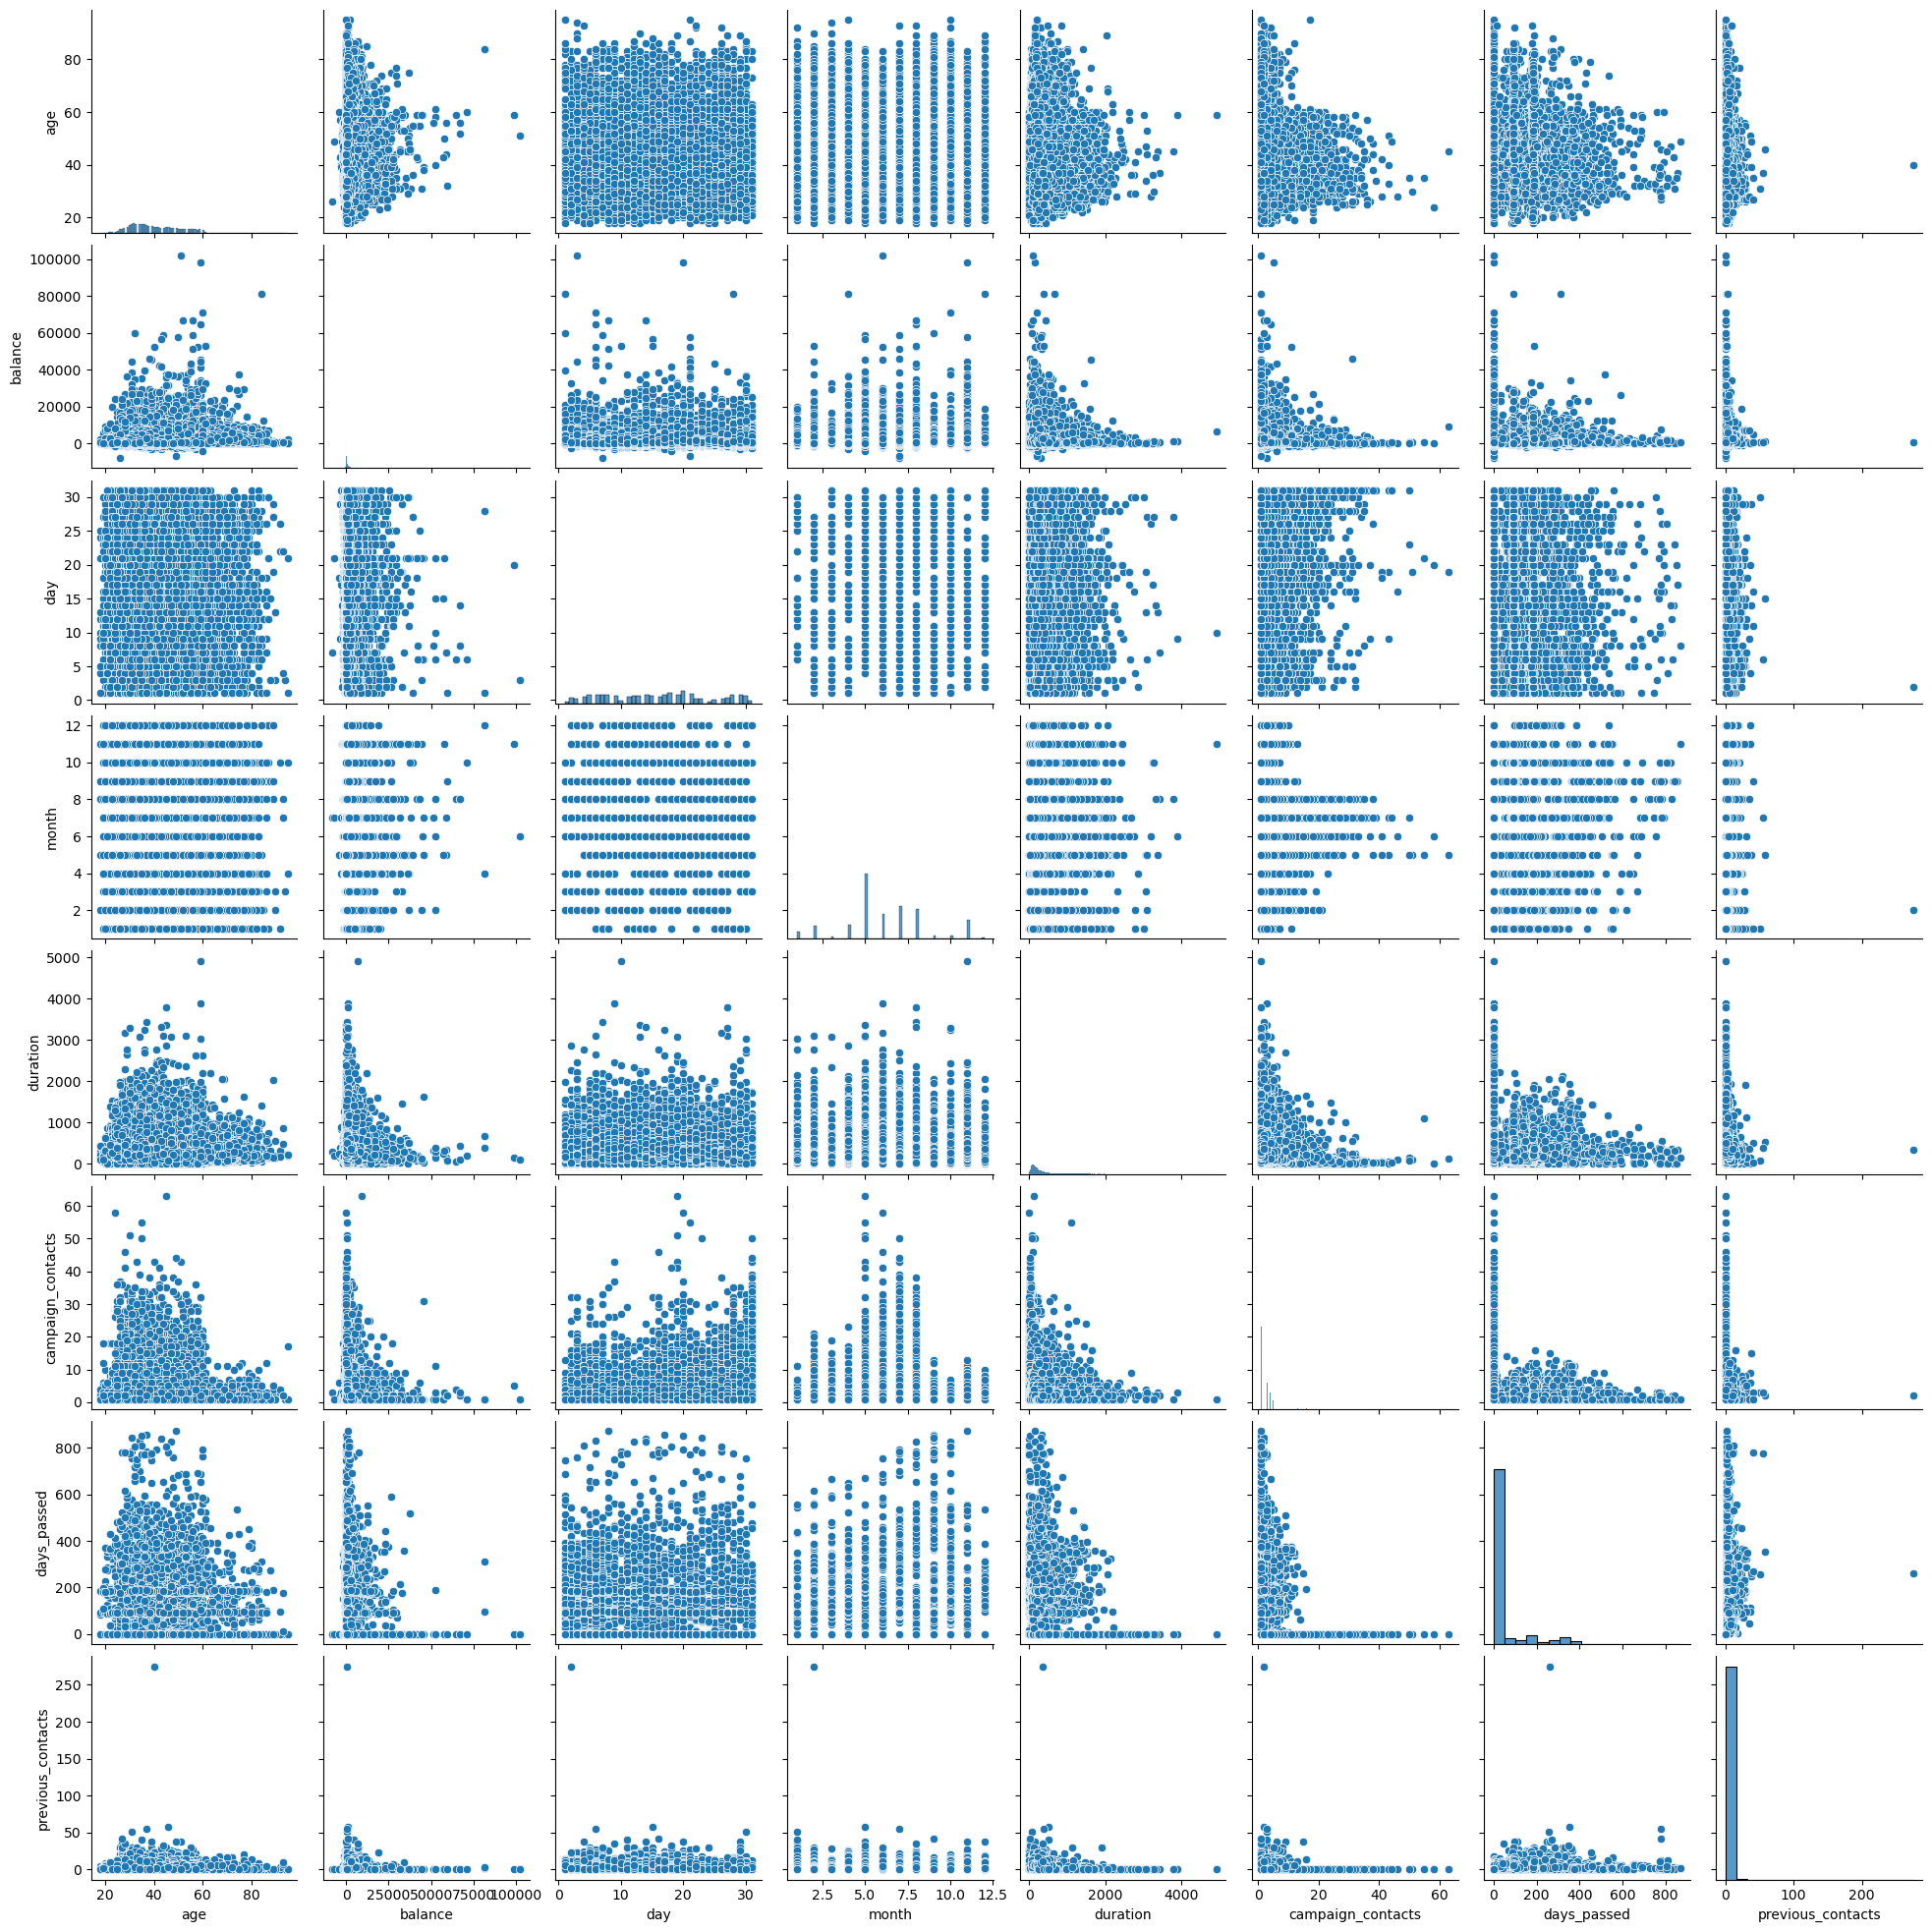

In [76]:
sns.pairplot(data_num)
plt.show()

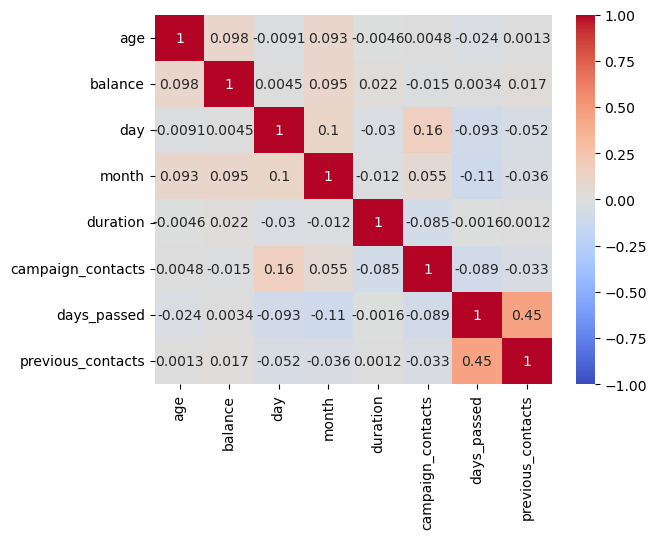

In [77]:
sns.heatmap(cor, annot = True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.show()

In [78]:
data['subscription'] = data['subscription'].replace({'yes': 1, 'no': 0})

In [79]:
corr_with_subs = data.corrwith(data['subscription'])
corr_with_subs

C:\Users\aabdu\AppData\Local\Temp\ipykernel_29712\3279763534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_subs = data.corrwith(data['subscription'])


age                  0.025155
balance              0.052838
day                 -0.028348
month                0.018717
duration             0.394521
campaign_contacts   -0.073172
days_passed          0.103621
previous_contacts    0.093236
subscription         1.000000
dtype: float64

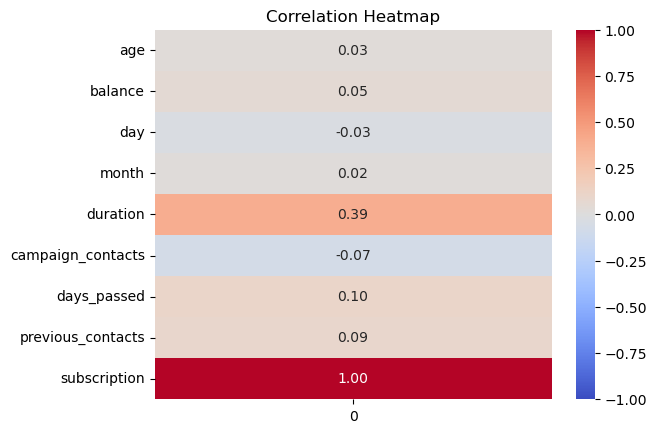

In [80]:
sns.heatmap(corr_with_subs.to_frame(), cmap='coolwarm', annot=True, fmt=".2f",  center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

**Correlation between (numerical) independant variables**

The higest correlation of 0.45 is b/n `days_passed` and `previous contacts`:
* In the data wrangling phase looking at the distribution of the variables we concluded that, 81.7% of the clients were never previously contacted for a previous campaign. And the number of clients not previously contacted from `days_passed` checks out with the number of contacts made to those clients being 0 in `previous_contacts`. Thus the number is 0 for 87.7% of the clients in `previous_contacts`. And this explains the high correlation seen between the two variables. (We may need to drop one of them to avoid multicollinearity problem).

The rest are all very week to no correlations of beteen -1.1 and 1.6.
* the fact that `day` and `campaign contacts` are some what correlated might make sense since the higher number of contacts the more likely of the last contact to be in the later days of the month if the the campaign ended by the end of that month. but not a significat info.
*  -1.1 correlation of `month` and `days passed` shows there cis a very weak negative correlation and it makes sense because more days will pass for the contacts made in the begining of the year than later.

**Correlation with the target variables**

* Looking at the correlation between numerical variables and the target, `duration` seems to have stronger correlation with the target than the rest of the variables. followed by `days_passed`. 
* `campaign_contacts` has a weak inverse corrlation with the target, suggesting that increase in number of contacts might have adverse effect on subscription. 
* The rest are negligible indicationg a very weak linear relationship with the target but there could be some non-linear relationships.

### 3.5.2 Visualizing Potential Relationships
<a id="3.5.2.Visualizingrelationships"></a>

In [81]:
# Defining Functions:

# For visualizing relationships between variables along with subscriptions.
def scatterplot(a, b):
    sns.relplot(x = a, y = b, hue = 'subscription', data = data, kind = 'scatter')
    return plt.show()

def barplot(a, b, n):
    sns.catplot(x = a, y = b, data = data, kind = 'bar', hue = 'subscription')
    plt.xticks(rotation = n)
    return plt.show()
    
    
data_yes = data[data['subscription'] == 'yes']
data_no = data[data['subscription'] == 'no']

def compare(a, b):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.scatterplot(x= a, y= b, data=data_yes, ax=ax[0])
    ax[0].set_title('Subscription: Yes')
    
    sns.scatterplot(x= a, y= b, data=data_no, ax=ax[1])
    ax[1].set_title('Subscription: No')
    return plt.show()

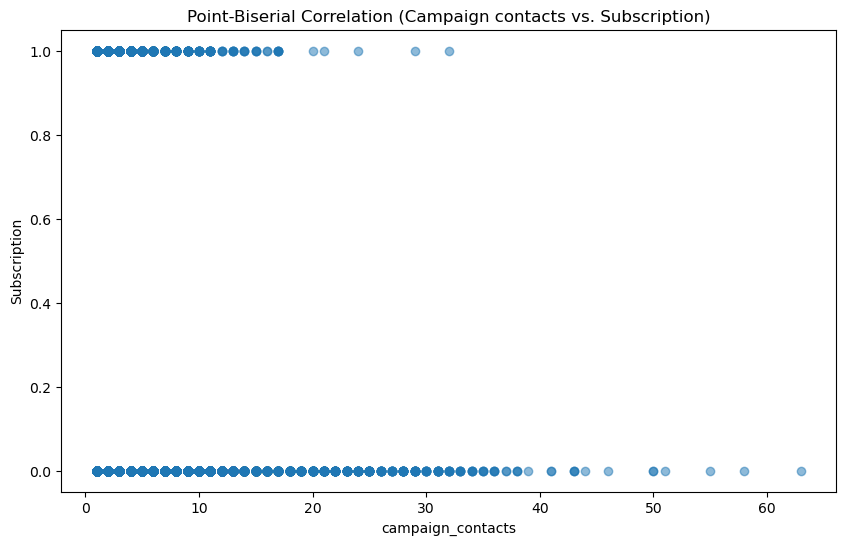

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(data['campaign_contacts'], data['subscription'], alpha=0.5)
plt.xlabel('campaign_contacts')
plt.ylabel('Subscription')
plt.title('Point-Biserial Correlation (Campaign contacts vs. Subscription)')
plt.show()

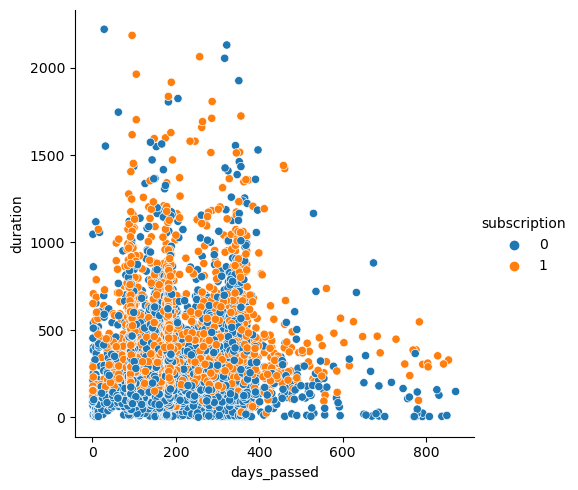

In [83]:
scatterplot(previously_contacted['days_passed'], 'duration')

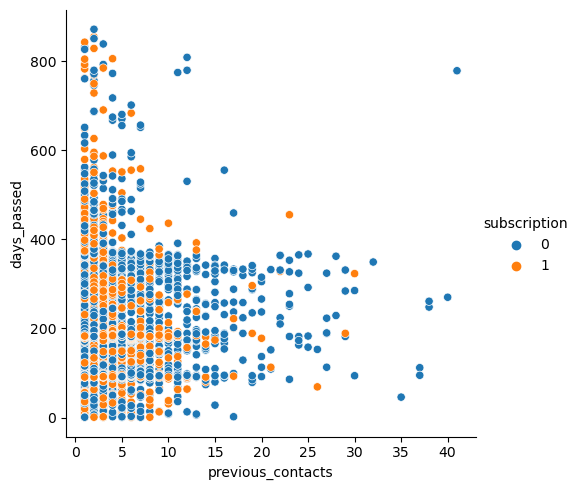

In [84]:
prev_contacts_no_outlier = data['previous_contacts'][data['previous_contacts'] <= 50]

scatterplot(prev_contacts_no_outlier,previously_contacted['days_passed'])

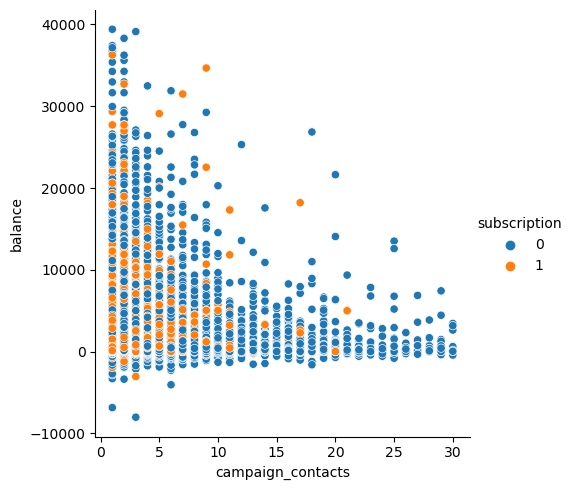

In [85]:
scatterplot(campc_no_outlier, data['balance'][data['balance'] <= 40000])

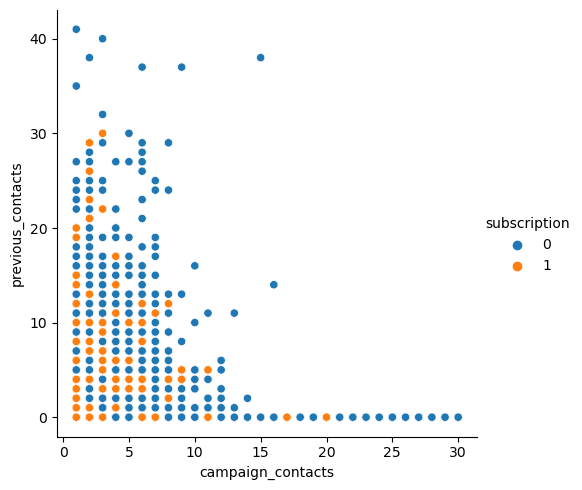

In [86]:
#excluding the outliers

scatterplot(campc_no_outlier, prev_contacts_no_outlier)

* The data points for `previous contacts` are clustered close to the lower end on all 3 plots, while there is a bit of dispersion for the values on the y axes.
* The fact that there are barely any data points representing subscribers that have a campaign_contacts value of greater than 30, affirms our previous observation that higher number of contacts made to clients may result in adverse effects on subscription.
* the last plot comparing the 'yes' vs. 'no' subscription of `campaign_contacts` against `previous_contacts` also shows that those customers with more frequent `previous_contacts` were contacted much less frequently for this campaign and also tended not to subscribe.

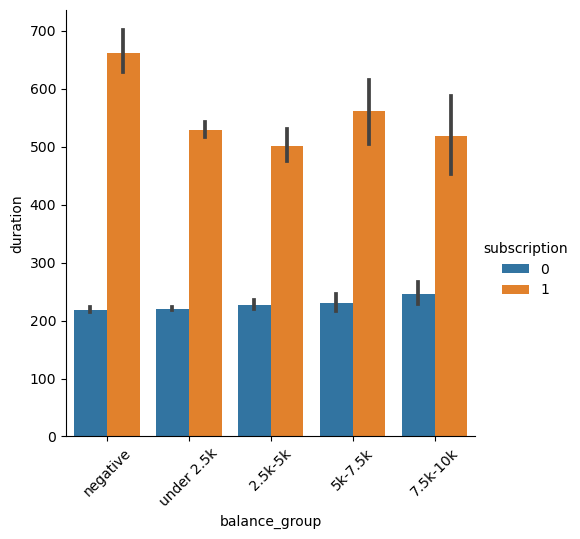

In [87]:
barplot('balance_group', 'duration', 45)

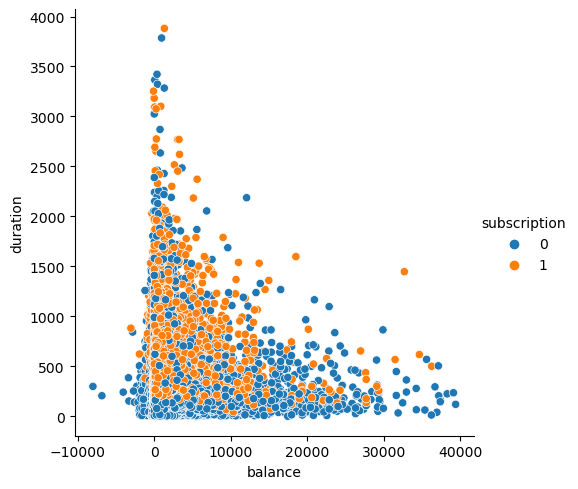

In [88]:
scatterplot( data['balance'][data['balance'] <= 40000], data['duration'][data['duration'] <= 4000])

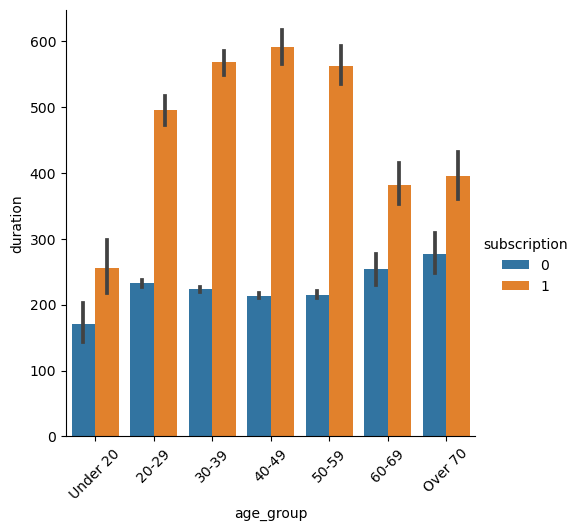

In [89]:
barplot('age_group', 'duration', 45)

* The longer duration of calls resulted in higher subscription rate, and this is especially the case for the range of age group from 30s upto 50s where subscribers had a significantly higher call duration. And it seems like longer duration tend to result in subscriptions across all balance groups as well.

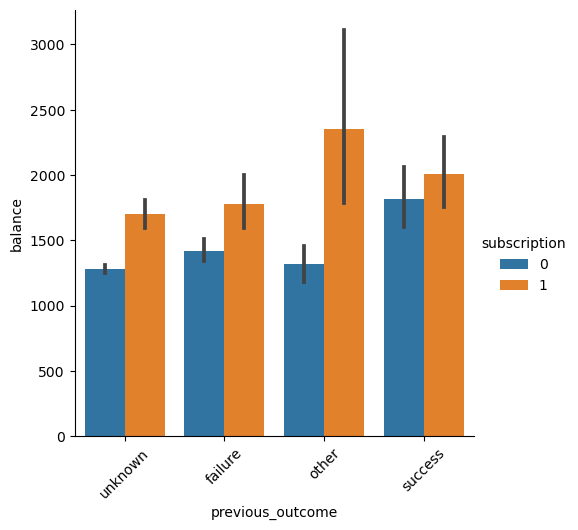

In [90]:
barplot('previous_outcome', 'balance', 45)


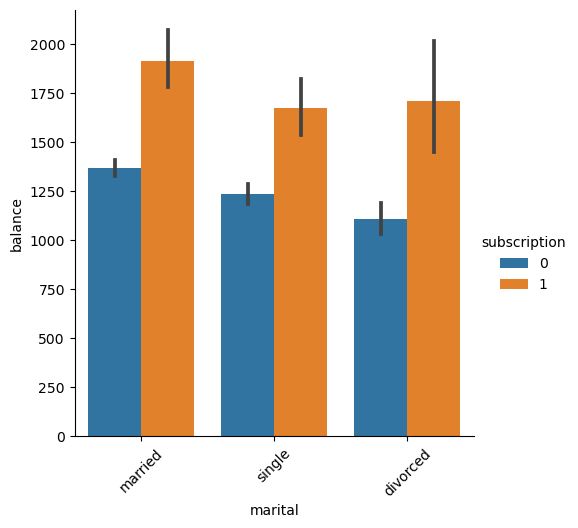

In [91]:
barplot('marital', 'balance', 45)

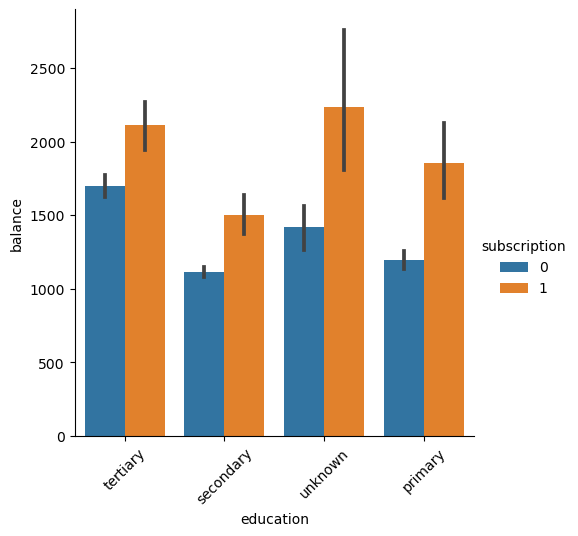

In [92]:
barplot('education', 'balance', 45)

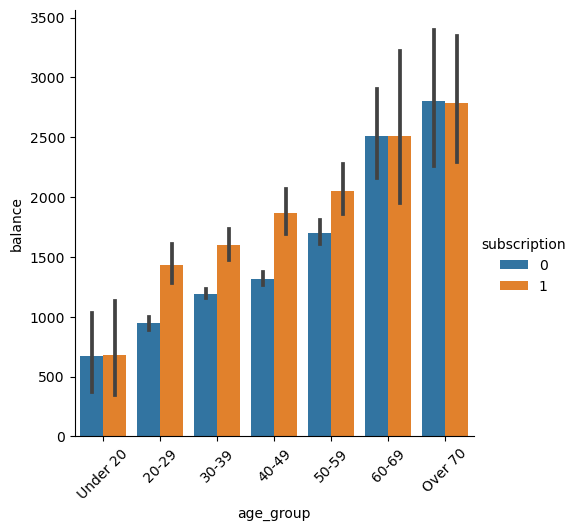

In [93]:
barplot('age_group', 'balance', 45)



* Customers with a 'yes' subscription tend to have a higher `balance` than those with 'no' subscriptions across all categories for the variables - `education`, `marital`, `previous_outcome`.
* However, while it's clear that the `age group` spanning from the 20s to 50s with a higher balance demonstrates a higher mean subscription, we cannot draw the same conclusion for the remaining age groups.

## 3.6. Summary
<a id="3.6.Summary"></a>



**Conclusions:**

* Individuals categorized as single exhibit a slightly higher subscription rate compared to their married and divorced counterparts.

* Sencondary level of education tends to be associated with an increased number of subscription to the term deposit than other levels.

* Generally, a moderately higher `balances` (low positives) are be associated with higher number of subscriptions. However, when ploting `age_group` against `balance` it's clear that only the age group spanning from the 20s to 50s with a higher balance demonstrate a higher mean subscription, and we cannot draw the same conclusion for the remaining age groups.

* Customers without existing `loans` show a higher rate of subscription, aligning with intuitive expectations.

* My analysis did not reveal a significant influence of `contact type` on the subscription rate. However, variations across months could be attributed to the timing of the campaign. And there is a pattern of subscription spike on the 30th day of the months.

* We can conclude that, overal, longer call `duration` and a moderate number of contacts appear to be linked with a higher number of subscription rate. And the gap in mean duration was especially higher for the range of age group from 30s upto 50s where subscribers had a significantly higher mean for call duration.

* Customers above the `age` of 60 and those below 30, as well as retirees and students, are likely to be associated with a higher number of subscription. This connection between age and job aligns with the expected demographics, where older individuals are likely to be retired and younger ones are likely to be students.

* The data points for `previous contacts` are clustered close to the lower end on all 3 plots, while there is a bit of dispersion for the values on the y axes. This again suggests that previous contacts may not be an important feature in determining subscription.

* Higher number of contacts made to clients may result in adverse effects on subscription.

* Moving forward it's importandt to note that the majority (more than 80%) of the values for `previous_outcome` are 'unknown' which are essentially missing values.

* The minimal variability observed in `days_passed`  and `previous_contacts` and the apparent high correlation raises concerns thus one of them may not be as useful to consider in the modeling. 